# Solution To Land Classification Challenge


In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [73]:
train_path = '/home/gaurav/Desktop/Social Cops/socialcops_challenge/socialcops_challenge/land_train.csv'
test_path  = '/home/gaurav/Desktop/Social Cops/socialcops_challenge/socialcops_challenge/land_test.csv'
data = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [4]:
print("The first 5 rows of the training dataset\n")
data.head(5)

The first 5 rows of the training dataset



,X1,X2,X3,X4,X5,X6,I1,I2,I3,I4,I5,I6,target
0,323,229,120,517,209,115,0.623234,-1.047476,1.473405,0.380537,-0.021277,0.424242,1
1,335,220,109,387,149,89,0.560484,-1.004514,1.200777,0.324813,-0.101010,0.444030,1
2,255,150,52,184,72,45,0.559322,-0.996822,0.825000,0.300728,-0.072165,0.437500,1
3,254,182,73,413,156,84,0.699588,-1.151258,1.425354,0.436268,0.070064,0.451670,1
4,257,219,100,722,254,130,0.756691,-1.236199,1.990973,0.506155,0.130435,0.479508,1


In [5]:
print("Basic summary of the training dataset")
data.describe()

Basic summary of the training dataset


,X1,X2,X3,X4,X5,X6,I1,I2,I3,I4,I5,I6,target
count,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000
mean,505.820582,778.290627,819.375336,1752.844418,1078.027418,739.470318,0.384085,-0.712814,1.615682,0.304885,-0.046779,0.328729,1.909091
std,428.347173,529.490028,674.422188,693.583645,868.842300,797.061740,0.387576,0.472998,1.652829,0.262865,0.421622,0.268098,0.995864
min,0.000000,79.000000,0.000000,77.000000,52.000000,25.000000,-0.517672,-1.566332,-2.842839,-0.390293,-0.904241,-0.822989,1.000000
25%,172.000000,333.000000,211.000000,1209.000000,256.000000,190.000000,-0.006770,-1.212487,-0.042051,0.041264,-0.474310,0.035974,1.000000
50%,540.000000,809.500000,817.000000,1785.000000,863.000000,346.000000,0.222476,-0.681110,1.048291,0.210903,0.170455,0.394099,2.000000
75%,699.000000,1022.000000,1237.000000,2148.000000,1601.000000,1245.000000,0.810632,-0.186692,3.352103,0.587857,0.257062,0.463504,3.000000
max,9346.000000,9615.000000,9877.000000,9316.000000,8249.000000,7180.000000,1.000000,1.144574,5.833693,0.930116,1.000000,0.881131,4.000000


In [6]:
data.info() #to check null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 13 columns):
X1        110000 non-null int64
X2        110000 non-null int64
X3        110000 non-null int64
X4        110000 non-null int64
X5        110000 non-null int64
X6        110000 non-null int64
I1        110000 non-null float64
I2        110000 non-null float64
I3        110000 non-null float64
I4        110000 non-null float64
I5        110000 non-null float64
I6        110000 non-null float64
target    110000 non-null int64
dtypes: float64(6), int64(7)
memory usage: 10.9 MB


Clearly there are no missing values in the data!

## Plotting the distribution of each column(feature)

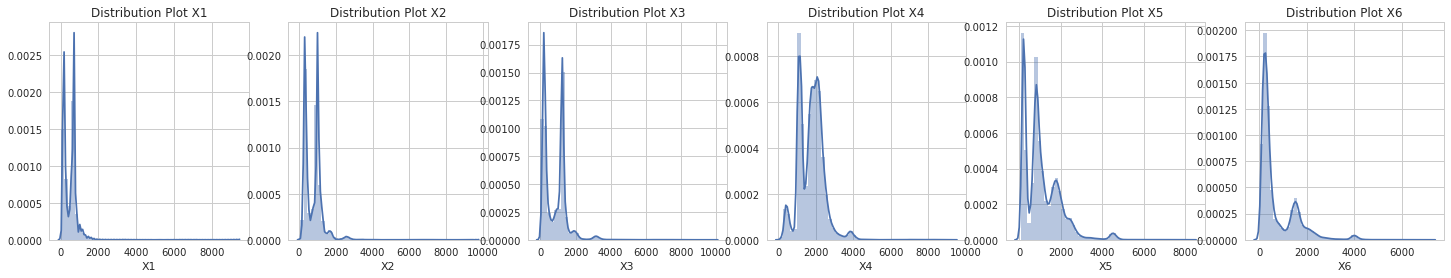

In [7]:
sns.set(style='whitegrid')
fig, axis = plt.subplots(nrows=1, ncols=6, figsize = (25,4))
for i in range(6):
    axis[i].set_title("Distribution Plot {}".format('X'+str(i+1)))
    sns.distplot(data['X'+str(i+1)], ax = axis[i])
    
plt.show()
    

From the distribution plots we can easily infer that X1,X2 and X3 features are very much correlated as their plots are very similar to each other


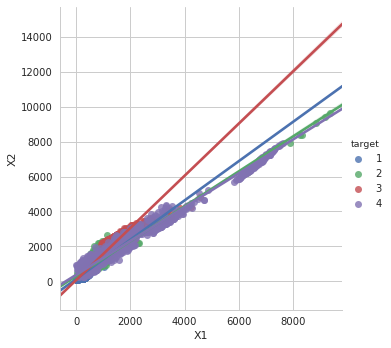

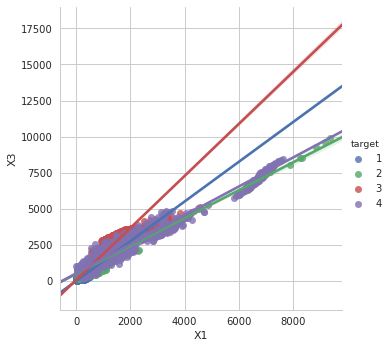

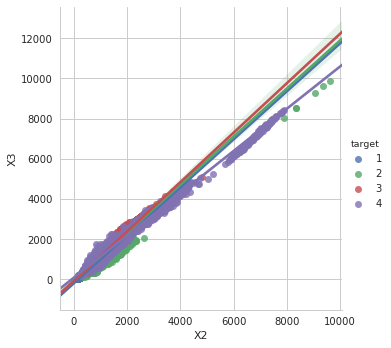

In [9]:
sns.lmplot('X1','X2', data=data, hue='target',fit_reg=True, size=5)
sns.lmplot('X1','X3', data=data, hue='target',fit_reg=True, size=5)
sns.lmplot('X2','X3', data=data, hue='target',fit_reg=True, size=5) 

From the plots above, it can be observed how X1, X2, X3 are correlated and the plot between X2 and X3 show very high positive correlation irrespective of class


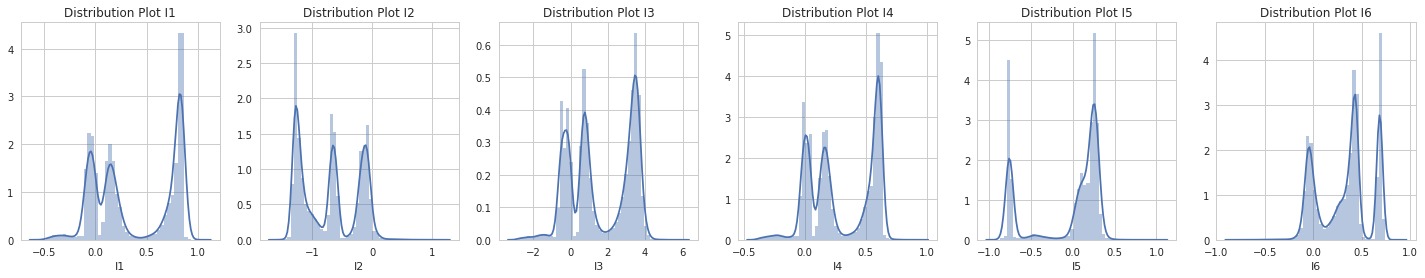

In [10]:
sns.set(style='whitegrid')
fig, axis = plt.subplots(nrows=1, ncols=6, figsize = (25,4))
for i in range(6):
    axis[i].set_title("Distribution Plot {}".format('I'+str(i+1)))
    sns.distplot(data['I'+str(i+1)], ax = axis[i])
    
plt.show()

Similarly I2, I3 and I4 also seem correlated

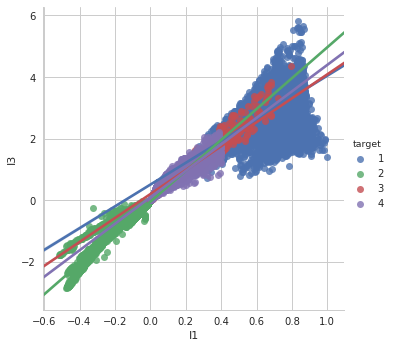

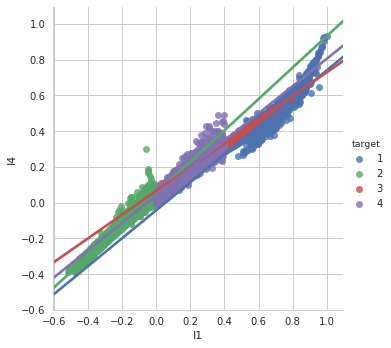

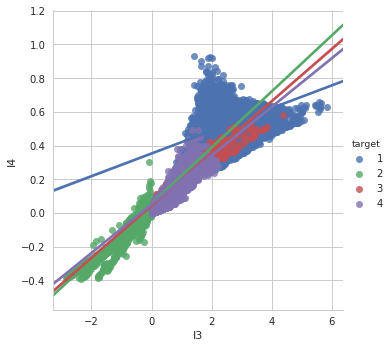

In [11]:
sns.lmplot('I1','I3', data=data, hue='target',fit_reg=True, size=5)
sns.lmplot('I1','I4', data=data, hue='target',fit_reg=True, size=5)
sns.lmplot('I3','I4', data=data, hue='target',fit_reg=True, size=5)

Scatter between I1 and I4 show high correlation irrespective of class

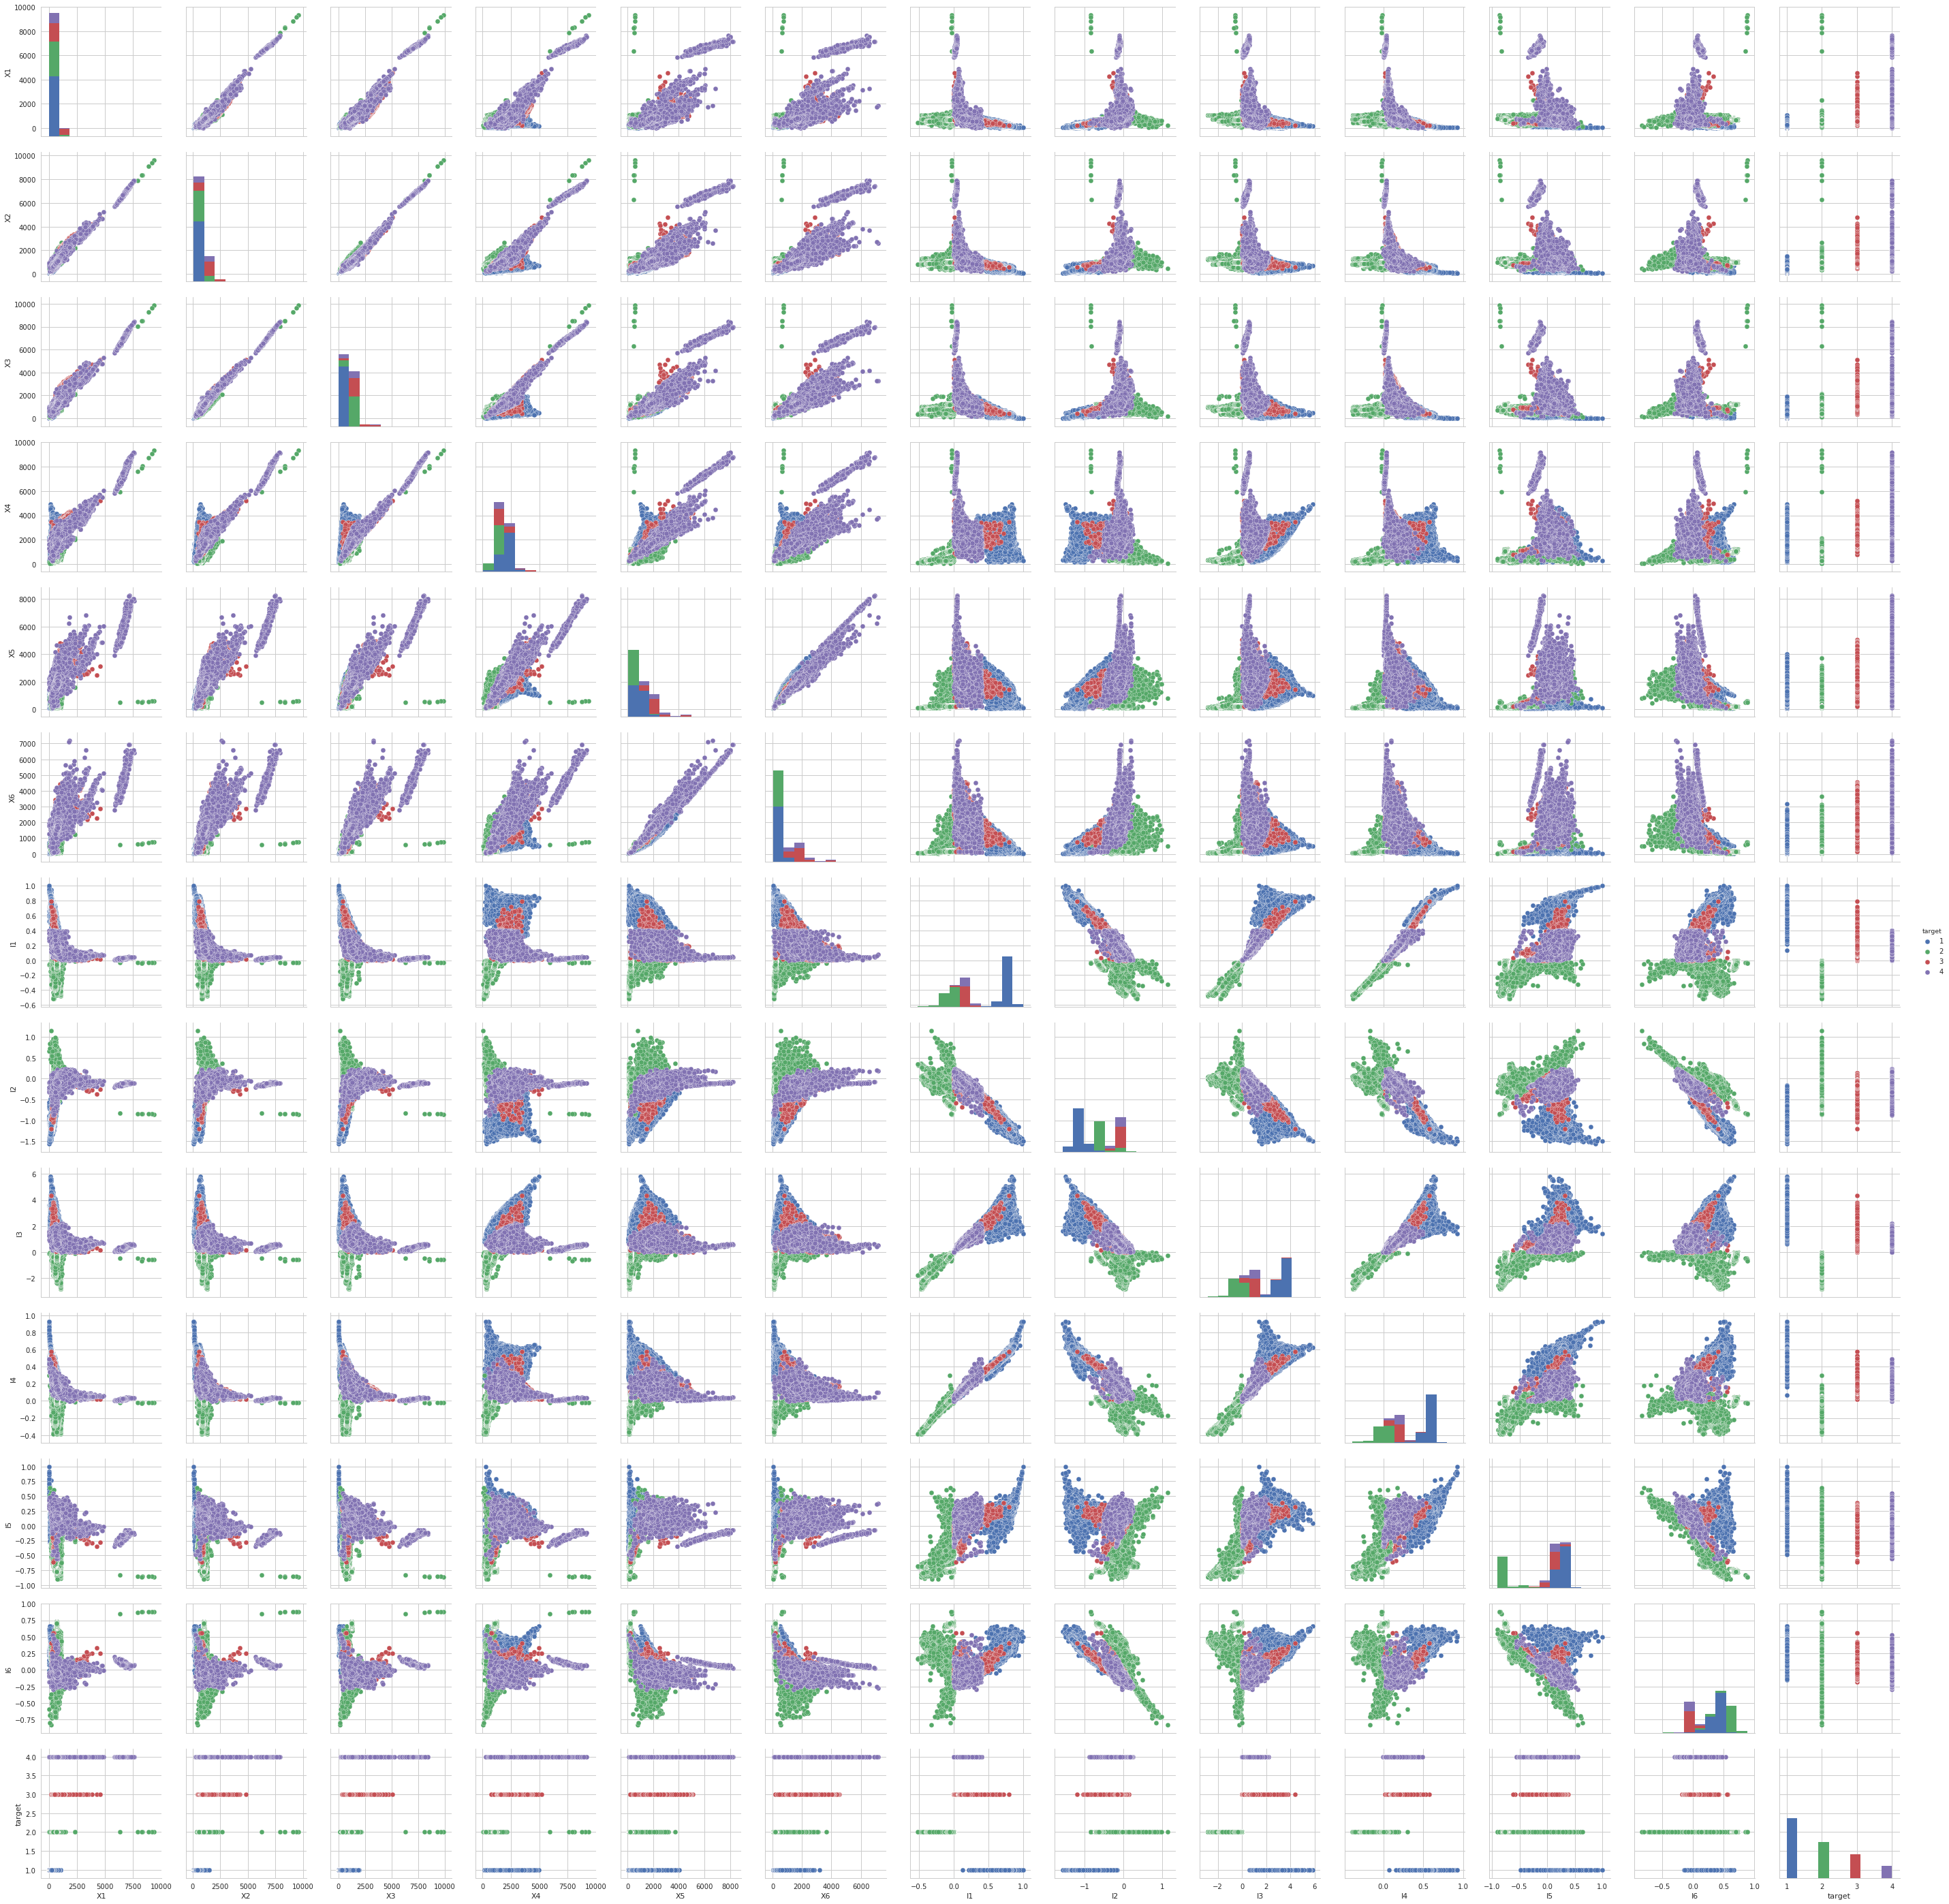

In [12]:
sns.pairplot(data, hue="target", size=3)

# Plotting the Correlation HeatMap


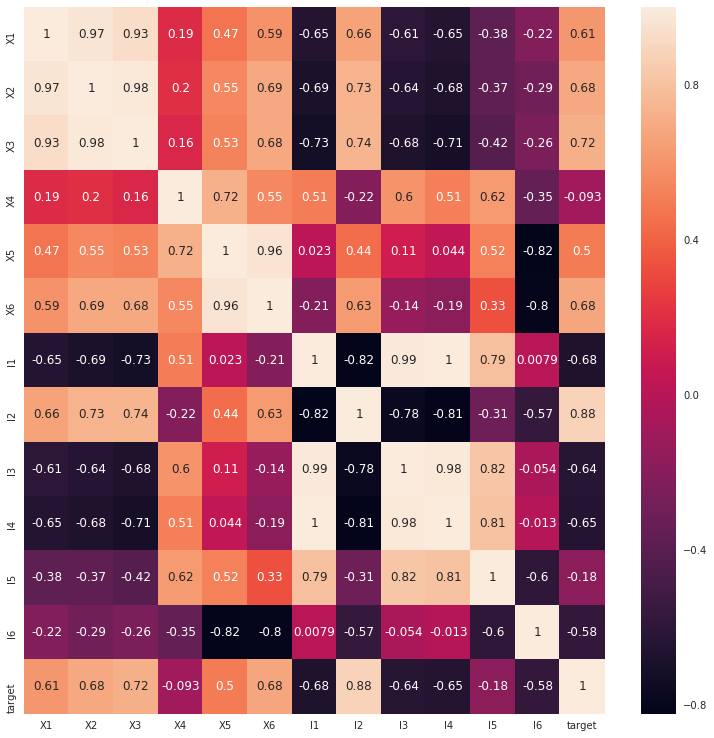

In [13]:
# Heatmap to see correlation of different feature
f, ax = plt.subplots(figsize=(13,13))
sns.heatmap(data.corr(), annot=True)
plt.show()

# Feature Selection


## Feature importance


In [4]:
from sklearn.ensemble import ExtraTreesClassifier


/home/gaurav/anaconda3/lib/python3.5/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [5]:
model = ExtraTreesClassifier()
model.fit(data.values[:,:-1],data.values[:,-1])
print(model.feature_importances_)


/home/gaurav/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[ 0.014944    0.02355257  0.07072214  0.08200373  0.03503455  0.01738636
  0.15874432  0.05372846  0.21649554  0.1034142   0.16211497  0.06185915]


## Feature selection by comparing explained feature variance

Reference : https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [4]:
from sklearn.preprocessing import StandardScaler

# Separating out the features
x = data.iloc[:,:].values

# Separating out the target
y = data.loc[:,['target']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

/home/gaurav/anaconda3/lib/python3.5/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [5]:
from sklearn.decomposition import PCA
pca1 = PCA()
x = pca1.fit_transform(x)
pca1.explained_variance_ratio_

array([  5.53690090e-01,   3.21493793e-01,   9.34671164e-02,
         1.28973544e-02,   1.08640457e-02,   5.35851892e-03,
         1.13210115e-03,   4.34720750e-04,   3.37599001e-04,
         2.45468002e-04,   4.64809338e-05,   3.27124288e-05,
         1.36582054e-16])

In [6]:
from sklearn.preprocessing import StandardScaler

# Separating out the features
x = data.iloc[:,:6].values

# Separating out the target
y = data.loc[:,['target']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

/home/gaurav/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/gaurav/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
from sklearn.decomposition import PCA
pca2 = PCA()
x = pca2.fit_transform(x)
pca2.explained_variance_ratio_

array([  6.92804284e-01,   2.36896133e-01,   5.86677800e-02,
         9.87730812e-03,   1.06578369e-03,   6.88711498e-04])

In [8]:
from sklearn.preprocessing import StandardScaler
# Separating out the features
x = data.iloc[:,6:-1].values

# Separating out the target
y = data.loc[:,['target']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [9]:
from sklearn.decomposition import PCA
pca3 = PCA()
x = pca3.fit_transform(x)
pca3.explained_variance_ratio_

array([  7.14342761e-01,   2.81387161e-01,   3.24158824e-03,
         6.32776628e-04,   3.95713179e-04,   2.95940822e-16])

Explained Variance

The explained variance tells us how much information (variance) can be attributed to each of the principal components.

Clearly the last componnent or feature in this case contains the least variance, therefore we drop it

In [10]:
data = data.drop(labels='I6',axis=1)

## Dealing with Outliers

Z-Score Approach

Reference : https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

In [11]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(data.iloc[:,:-1]))
print(z)

[[ 0.42680663  1.03740032  1.03700401 ...,  0.08608109  0.28780092
   0.06048688]
 [ 0.39879184  1.05439788  1.05331435 ...,  0.2510282   0.07581156
   0.12862552]
 [ 0.58555708  1.18660116  1.13783152 ...,  0.47838305  0.01581214
   0.06021041]
 ..., 
 [ 0.22920629  0.39417234  0.56289131 ...,  0.50064517  0.5028006
   0.3226388 ]
 [ 0.12415084  0.26574629  0.43389141 ...,  0.45663443  0.44081277
   0.43663716]
 [ 0.06111757  0.20153327  0.35382251 ...,  0.41899204  0.38525141
   0.52993914]]


In [12]:
filtered = data[(z < 3).all(axis=1)]

In [13]:
filtered.shape

(107515, 12)

In [14]:
data.shape

(110000, 12)

## Generating pie chart to visualize the number of examples in each target class 

(array([ 49919.,      0.,      0.,  29954.,      0.,      0.,  18322.,
             0.,      0.,   9320.]),
 array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ]),
 <a list of 10 Patch objects>)

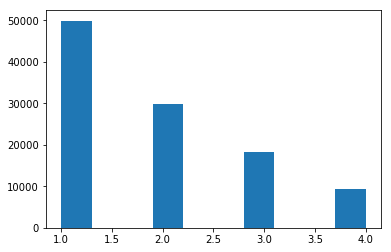

In [15]:
plt.hist(filtered.iloc[:,-1])

In [16]:
filtered['target'].value_counts()

1    49919
2    29954
3    18322
4     9320
Name: target, dtype: int64

## Training and Validation Splitting


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split( filtered.iloc[:,:-1],filtered.iloc[:,-1],test_size=0.25, random_state=1)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)


(80636, 11)
(26879, 11)
(80636,)
(26879,)


## Balancing the dataset 

Using SMOTE - Synthetic Minority OverSampling Method

In [18]:
from imblearn.over_sampling import SMOTE

In [19]:
sampler = SMOTE()
X_train, y_train = sampler.fit_resample(X_train,y_train)

(array([ 37368.,      0.,      0.,  37368.,      0.,      0.,  37368.,
             0.,      0.,  37368.]),
 array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ]),
 <a list of 10 Patch objects>)

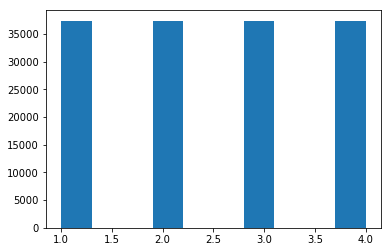

In [20]:
plt.hist(y_train)

One Hot encoding the categorical data

In [21]:
from keras.utils import np_utils

Using TensorFlow backend.


In [22]:
y_train  = np_utils.to_categorical(y_train)
y_val  = np_utils.to_categorical(y_val)

print(y_train)
print(y_train.shape)
print(y_val.shape)

[[ 0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 ..., 
 [ 0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  1.]]
(149472, 5)
(26879, 5)


In [23]:
y_train = y_train[:,1:]
y_val = y_val[:,1:]

In [24]:
print(y_train.shape)
print(y_val.shape)

(149472, 4)
(26879, 4)


## Normalizing Data


In [25]:
from sklearn.preprocessing import StandardScaler
normalizer=StandardScaler()
X_train=normalizer.fit_transform(X_train)
X_val = normalizer.transform(X_val)
print(X_train.shape)
print(X_val.shape)

(149472, 11)
(26879, 11)


/home/gaurav/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


## Training the Data

In [56]:
#Importing Keras Libraries
import keras
from keras.layers import Input,Dense,BatchNormalization, Activation, Dropout, Add
from keras.models import Model
from keras.utils.vis_utils import plot_model
from keras import optimizers

In [64]:
epochs=50
number_of_classes=4
batch_size=150

In [88]:
inpt = Input(shape=(11,), name='input')

x1 = Dense(units=8)(inpt)
x1 = BatchNormalization()(x1)
x1 = Activation('relu')(x1)

x2 = Dense(units=8)(x1)
x2 = BatchNormalization()(x2)
x2 = Activation('relu')(x2)
x2 = Dropout(0.2)(x2)

x3 = Dense(units=8)(x2)
x3 = BatchNormalization()(x3)
x3 = Activation('relu')(x3)

x4 = Add()([x1,x3])
x4 = BatchNormalization()(x4)
x4 = Activation('relu')(x4)
x4 = Dropout(0.2)(x4)


out = Dense(units=number_of_classes,activation='softmax')(x4)
model = Model(inputs=inpt, outputs=out)

In [89]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 11)           0                                            
__________________________________________________________________________________________________
dense_33 (Dense)                (None, 8)            96          input[0][0]                      
__________________________________________________________________________________________________
batch_normalization_29 (BatchNo (None, 8)            32          dense_33[0][0]                   
__________________________________________________________________________________________________
activation_30 (Activation)      (None, 8)            0           batch_normalization_29[0][0]     
__________________________________________________________________________________________________
dense_34 (

In [90]:
checkpoint = keras.callbacks.ModelCheckpoint('weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)
adam = optimizers.Adam(lr=0.01, decay=0.0001)
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
output = model.fit(x=X_train,y=y_train,batch_size=batch_size, epochs=epochs,validation_data = (X_val,y_val), callbacks=[checkpoint])

Train on 149472 samples, validate on 26879 samples
Epoch 1/50
149472/149472 [==============================] - 8s 52us/step - loss: 0.3273 - acc: 0.8690 - val_loss: 0.0982 - val_acc: 0.9650
Epoch 2/50
149472/149472 [==============================] - 6s 39us/step - loss: 0.2379 - acc: 0.9062 - val_loss: 0.0931 - val_acc: 0.9658
Epoch 3/50
149472/149472 [==============================] - 6s 39us/step - loss: 0.2155 - acc: 0.9175 - val_loss: 0.0962 - val_acc: 0.9667
Epoch 4/50
149472/149472 [==============================] - 6s 40us/step - loss: 0.2077 - acc: 0.9197 - val_loss: 0.0829 - val_acc: 0.9700
Epoch 5/50
149472/149472 [==============================] - 6s 40us/step - loss: 0.2077 - acc: 0.9215 - val_loss: 0.0958 - val_acc: 0.9676
Epoch 6/50
149472/149472 [==============================] - 6s 40us/step - loss: 0.2030 - acc: 0.9219 - val_loss: 0.0873 - val_acc: 0.9689
Epoch 7/50
149472/149472 [==============================] - 6s 40us/step - loss: 0.1999 - acc: 0.9228 - val_loss: 0

KeyboardInterrupt: 

In only 50 epochs we can see that validation loss is less than training loss, hence we can infer that the model is generalizing

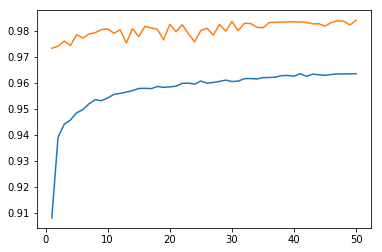

In [68]:

accs=output.history['acc']
val_accs=output.history['val_acc']
x_axis=[i+1 for i in range(epochs)]
plt.plot(x_axis,accs)
plt.plot(x_axis,val_accs)
plt.show()



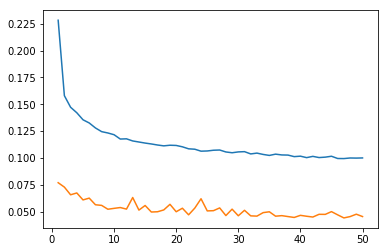

In [69]:
loss=output.history['loss']
val_loss=output.history['val_loss']
x_axis=[i+1 for i in range(epochs)]
plt.plot(x_axis,loss)
plt.plot(x_axis,val_loss)
plt.show()


In [70]:
# Loading the model and Weights of which gave the least validation loss
from keras.models import load_model
model = load_model('/home/gaurav/Desktop/Social Cops/socialcops_challenge/socialcops_challenge/weights.47-0.04.hdf5')

Confusion Matrix

In [71]:
from sklearn.metrics import classification_report
y_val_pred=np.argmax(model.predict(X_val),axis=1)
y_val_pred=y_val_pred+1
y_val_n = np.argmax(y_val,axis=1)
y_val_n+=1
print(classification_report(y_val_n, y_val_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     12551
           2       1.00      1.00      1.00      7490
           3       0.95      0.97      0.96      4583
           4       0.92      0.90      0.91      2255

   micro avg       0.98      0.98      0.98     26879
   macro avg       0.97      0.97      0.97     26879
weighted avg       0.98      0.98      0.98     26879



## Making predictions

In [74]:
test = test.drop('I6',axis=1)
X_test = np.array(test)
X_test = normalizer.transform(X_test)

In [75]:
X_test.shape

(2000000, 11)

In [76]:
y_pred = np.argmax(model.predict(X_test), axis=1)

In [77]:
print(y_pred)

[3 2 0 ..., 3 2 3]


In [78]:
y_pred = y_pred+1

In [79]:
print(y_pred)

[4 3 1 ..., 4 3 4]


In [80]:
test['target'] = pd.DataFrame(y_pred)

In [81]:
test

,X1,X2,X3,X4,X5,X6,I1,I2,I3,I4,I5,target
0,338,554,698,1605,1752,1310,0.393834,-0.350045,1.565423,0.311659,0.304781,4
1,667,976,1187,1834,1958,1653,0.214167,-0.181467,1.050679,0.196439,0.164085,3
2,249,420,402,1635,1318,736,0.605302,-0.712650,2.268984,0.441984,0.293497,1
3,111,348,279,1842,743,328,0.736917,-1.162062,3.074176,0.551699,0.080725,1
4,349,559,642,1534,1544,989,0.409926,-0.406678,1.607795,0.323984,0.212753,4
5,363,496,501,833,800,564,0.248876,-0.269084,0.821571,0.215513,0.059155,4
6,538,821,837,1224,1159,1034,0.187773,-0.215049,0.792773,0.189002,0.105291,4
7,560,683,680,1018,965,764,0.199058,-0.225785,0.759024,0.168196,0.058172,4
8,607,758,818,1164,1374,1142,0.174571,-0.091829,0.686800,0.153604,0.165306,4
9,231,434,363,2102,1167,568,0.705477,-0.991497,3.041530,0.509306,0.220193,1


In [82]:

temp=pd.read_csv('/home/gaurav/Desktop/Social Cops/socialcops_challenge/socialcops_challenge/land_test.csv')
df=pd.DataFrame(data=test)
df['I6']=temp['I6']
target=df['target']
df=df.drop(['target'],axis=1)
df['target']=target
print(df)
df.to_csv('labelled_land_test.csv',index=False)



          X1    X2    X3    X4    X5    X6        I1        I2        I3  \
0        338   554   698  1605  1752  1310  0.393834 -0.350045  1.565423   
1        667   976  1187  1834  1958  1653  0.214167 -0.181467  1.050679   
2        249   420   402  1635  1318   736  0.605302 -0.712650  2.268984   
3        111   348   279  1842   743   328  0.736917 -1.162062  3.074176   
4        349   559   642  1534  1544   989  0.409926 -0.406678  1.607795   
5        363   496   501   833   800   564  0.248876 -0.269084  0.821571   
6        538   821   837  1224  1159  1034  0.187773 -0.215049  0.792773   
7        560   683   680  1018   965   764  0.199058 -0.225785  0.759024   
8        607   758   818  1164  1374  1142  0.174571 -0.091829  0.686800   
9        231   434   363  2102  1167   568  0.705477 -0.991497  3.041530   
10       343   553   568  1848  1658   971  0.529801 -0.583994  2.161743   
11       317   515   542  1993  1668   952  0.572387 -0.661160  2.398101   
12       428